In [74]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt


### Make plots bigger

import seaborn as sns

In [79]:
sns.set(style='whitegrid', rc={'figure.figsize':(20.7,8.27)})

from pdkit.gait_time_series import GaitTimeSeries
from pdkit.gait_processor import GaitProcessor
from pdkit.utils import butter_lowpass_filter

import scipy.signal as sig
import pywt

clean_data = '/src/data/pdkit/GAIT_-_2018-06-14_13-50-58_-_d90b653403_-_13311.csv'

gd = GaitTimeSeries.load_data(clean_data, format_file='gait_gyro')

Sampling rate is 499.6666666666667 Hz
Sampling rate is 499.6666666666667 Hz


In [33]:
gp = GaitProcessor(sampling_frequency=50.0, filter_order=4, cutoff_frequency=2.0)

d = gp.resample_signal(gd)

In [34]:
df = gp.filter_data_frame(d, centre=True)

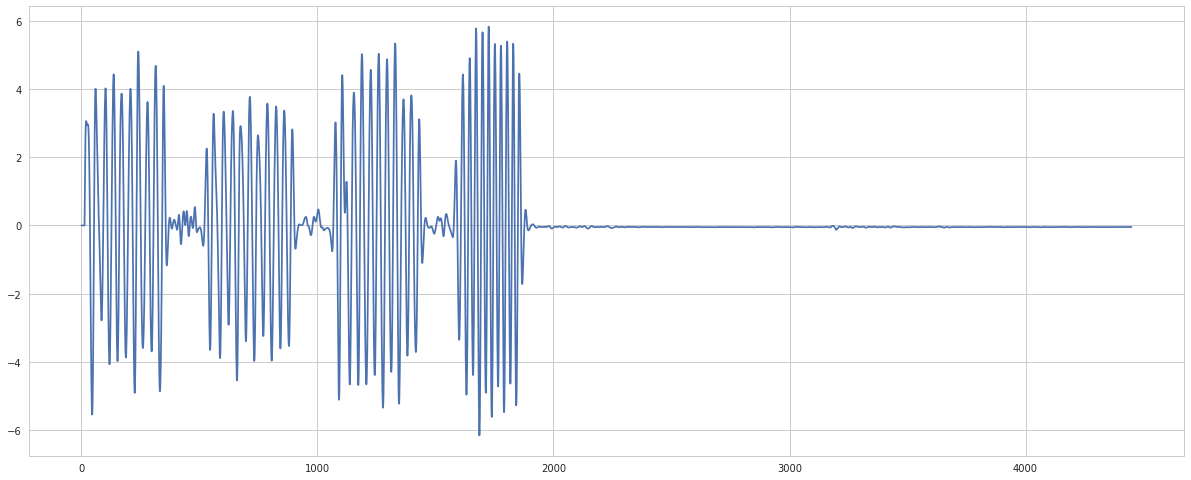

In [35]:
# let's work on magnitude data from now on...
data = df.mag_sum_acc.values
plt.plot(data)

In [96]:
import sklearn.cluster as cluster
import sklearn.mixture as mixture

In [37]:
ms = cluster.MeanShift(bin_seeding=False)

In [59]:
ac = cluster.AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

In [66]:
sc = cluster.SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity="nearest_neighbors", gamma=0.5)

In [84]:
ap = cluster.AffinityPropagation(damping=0.5)#, preference=params['preference'])

In [94]:
b = cluster.Birch(n_clusters=3)

In [103]:
dbs = cluster.DBSCAN(eps=1)

In [88]:
def plot_clusters(data, clustering):
    CLR = ['red', 'green', 'blue', 'yellow', 'magenta', 'orange', 'purple']
    peaks, _ = sig.find_peaks(data)
    prominences = sig.peak_prominences(data, peaks)[0]
    
    clusters = clustering(prominences.reshape(-1, 1))
    
    contour_heights = data[peaks] - prominences
    colors = [CLR[i] for i in clusters]
    plt.plot(data)
    plt.scatter(peaks, data[peaks], color=colors)
    plt.vlines(x=peaks, ymin=contour_heights, ymax=data[peaks], color=colors)

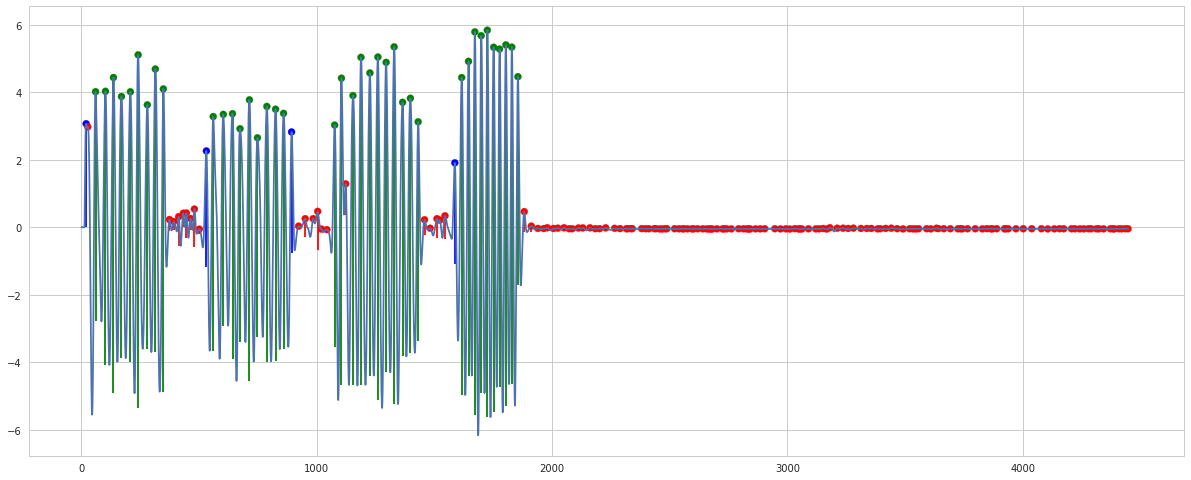

In [89]:
plot_clusters(data, ms.fit_predict)

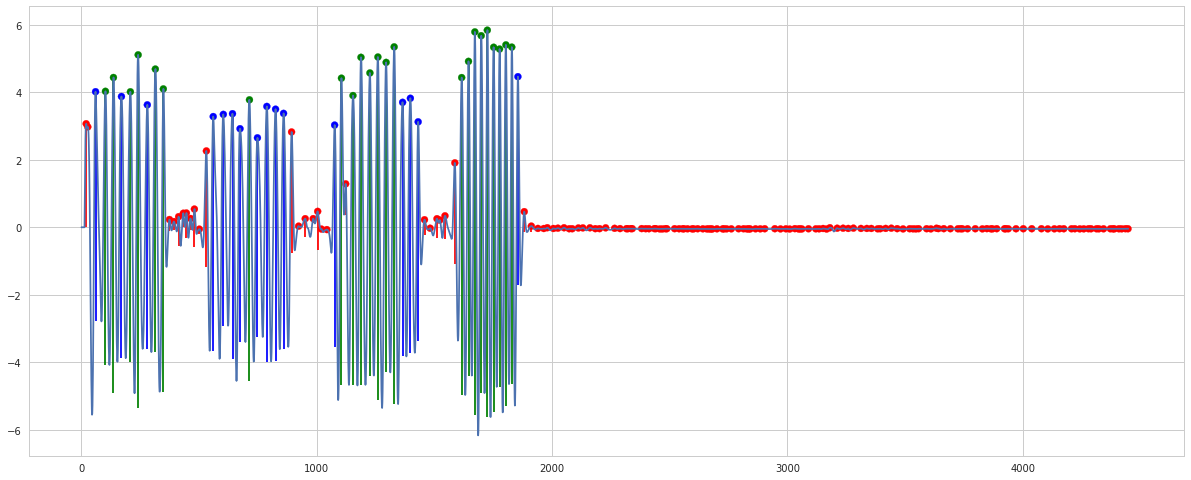

In [90]:
plot_clusters(data, ac.fit_predict)

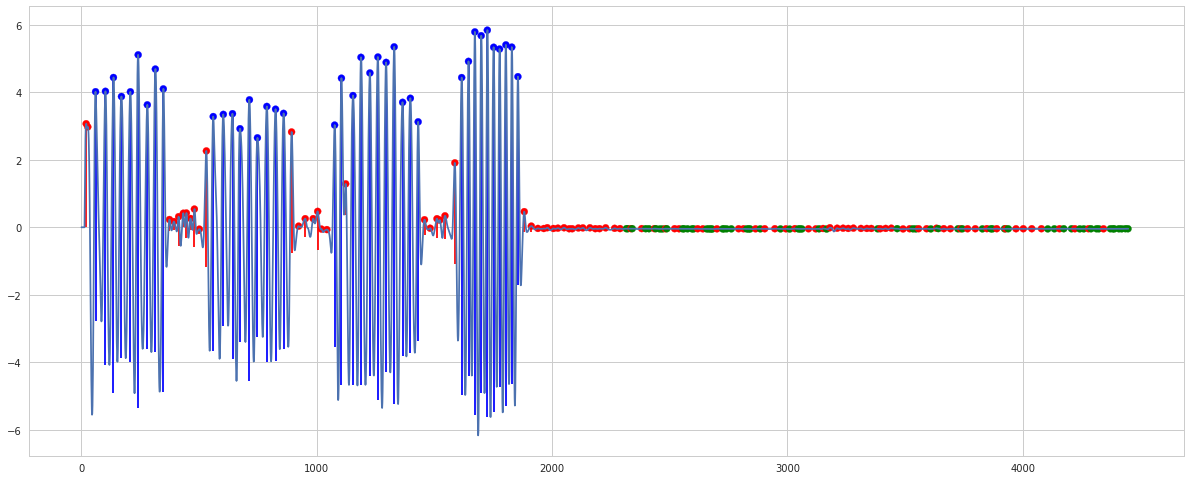

In [98]:
plot_clusters(data, sc.fit_predict)

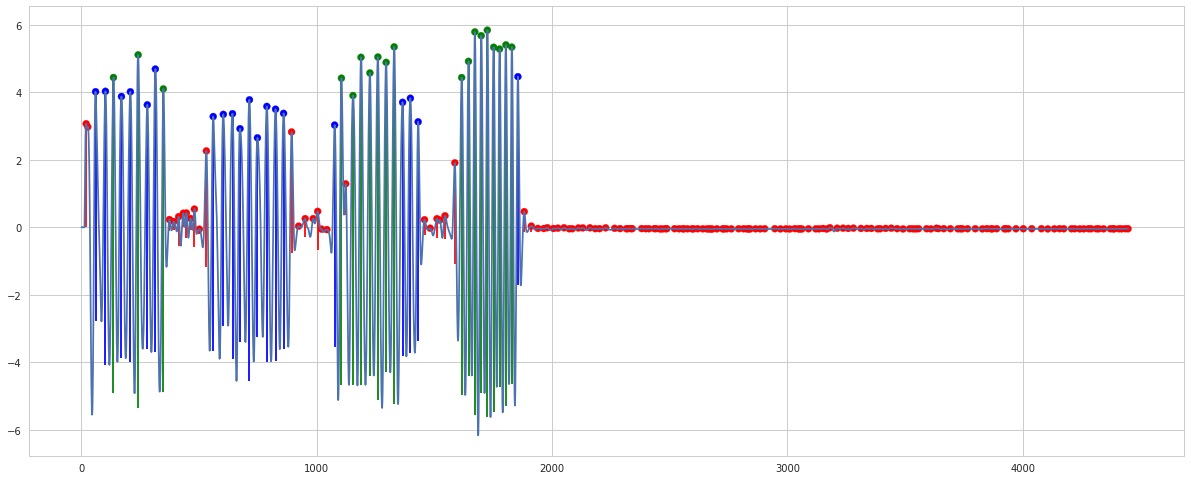

In [101]:
plot_clusters(data, b.fit_predict)

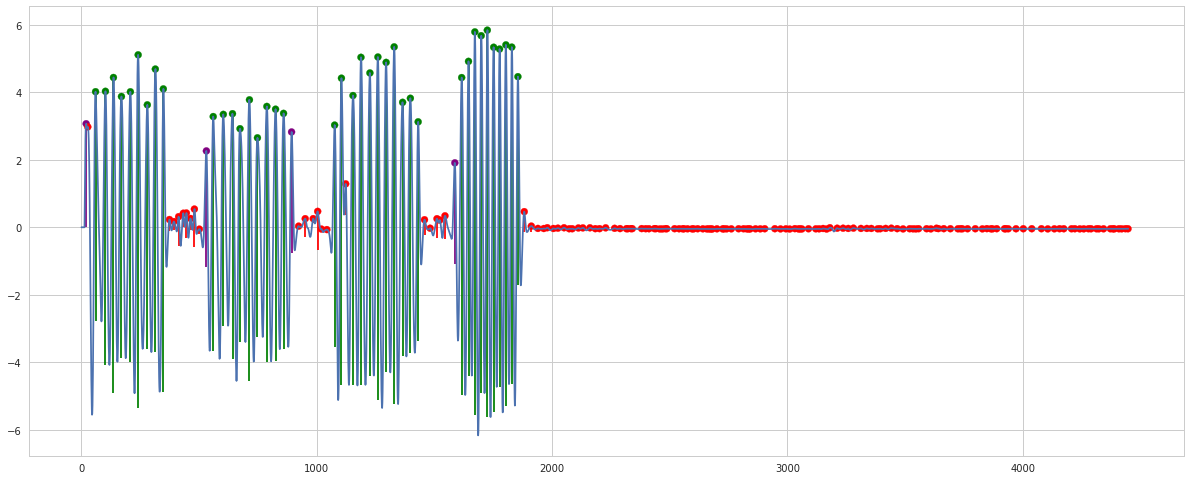

In [104]:
plot_clusters(data, dbs.fit_predict)